# FWI Data Inventory

This script directly reads from GitHub's repo joint-evaluation [catalog.csv](https://github.com/euro-cordex/joint-evaluation/blob/main/catalog.csv) and yields an overview of available hourly variables for FWI calculation

***
Note: to obtain the same results, just use the helper `availableModels(do.plot=TRUE)`
***

In [13]:
require(magrittr)
require(dplyr)

In [14]:
url <- "https://raw.githubusercontent.com/euro-cordex/joint-evaluation/refs/heads/main/catalog.csv"
data <- read.csv(url)

In [15]:
hourly.fwi <- subset(data,
                     subset = frequency %in% c("1hr") & variable_id %in% c("hurs", "tas", "sfcWind", "uas", "vas", "pr"))

In [16]:
# Grouped summary
hf <- hourly.fwi %>% group_by(institution_id, driving_source_id, driving_experiment_id, source_id) 

In [17]:
ids <- c("project_id", "mip_era", "activity_id", "domain_id", "institution_id",
         "driving_source_id", "driving_experiment_id", "driving_variant_label",
         "source_id", "version_realization", "frequency", "variable_id")

In [18]:
## Unique rows (skip file path and variable version info)
hf1 <- dplyr::distinct(hf, !!!syms(ids)) %>% as.data.frame()

In [19]:
## Save data inventory as csv (uncomment if needed)
# write.csv(hf1,
#           file = paste0("fwi_vars_1h_eval_", Sys.Date(), ".csv"),
#           row.names = FALSE)

## Data availability Matrix

In [20]:
## Label vars as 'var_id-1hr'
hf1[["var_freq"]] <- paste(hf1$variable_id, hf1$frequency, sep = "-")

In [21]:
# Binary matrix
binary_matrix <- table(hf1$var_freq, hf1$source_id)

# matrix as data.frame (for plotting)
binary_df <- as.data.frame(as.table(binary_matrix))

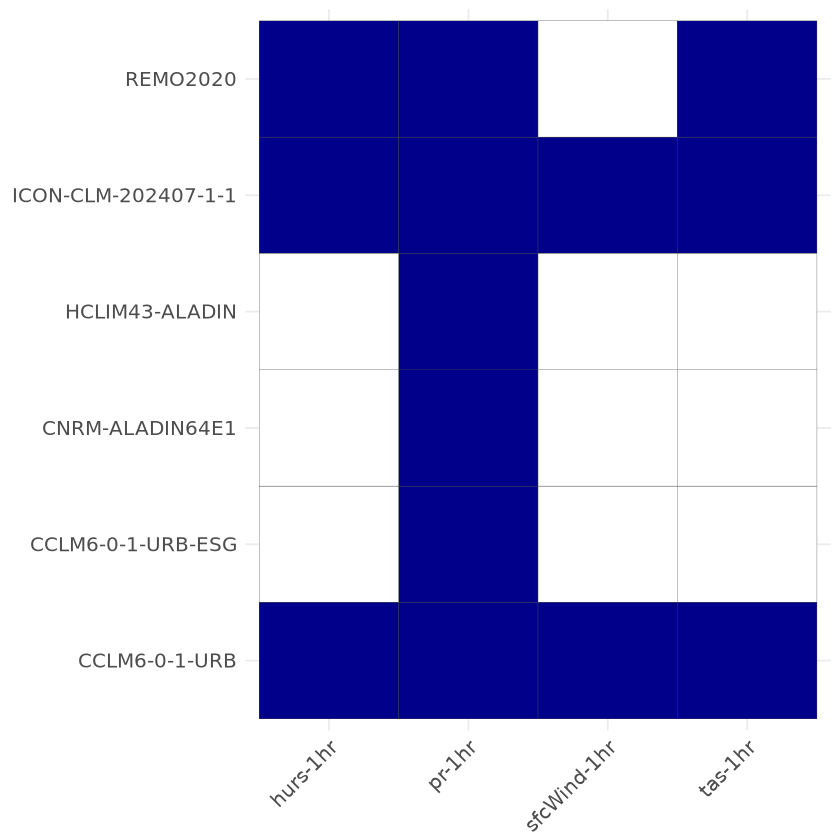

In [22]:
## Plotting
require(ggplot2)

ggplot2::ggplot(binary_df, aes(Var1, Var2)) +
    geom_tile(aes(fill = Freq), color = "gray30") +
    scale_fill_gradient(low = "white", high = "darkblue", guide = "none") +
    labs(x = NULL, y = NULL, fill = "Frequency") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
          axis.text.y = element_text(size = 12))

## Vector of complete available model names

In [30]:
which(colSums(binary_matrix) == 4L) %>% names()

[1] "CCLM6-0-1-URB"       "ICON-CLM-202407-1-1"